# Classifying Handwritten digits using Tensorflow 2.x

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##Problem Statement

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

####**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Single Layer Perceptron model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add hidden layer to the model to make it Multi-Layer Perceptron
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use different optimizers and check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

####**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



####**Skills Gained**

- TensorFlow 2.x
- Single Layer Perceptron
- Multi Layer Perceptron
- Model Improvisation

# Solution: Classifying Handwritten digits using Tensorflow 2.x

##Installing TensorFlow 2.x

In [1]:
# !pip install tensorflow

In [2]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.__version__)
print(tf.keras.__version__)


2.4.0
2.4.0


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [3]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


###Data Preprocessing

In [5]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
#intensity of each pixel is divided by 255, the maximum intensity value
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [6]:
print(X_train.shape)
print(Y_train.shape)

(60000, 784)
(60000, 10)


## Designing the Model

###Preparing the Model 0: Single layer Perceptron

Build the `Sequential` model with 0 hidden layers. Choose an optimizer and loss function for training:

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='first_layer', activation='softmax')) 

In [8]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 4s 3ms/step - loss: 1.4715 - accuracy: 0.6057 - val_loss: 0.6600 - val_accuracy: 0.8562
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6473 - accuracy: 0.8508 - val_loss: 0.5116 - val_accuracy: 0.8734
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5229 - accuracy: 0.8703 - val_loss: 0.4520 - val_accuracy: 0.8858
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4789 - accuracy: 0.8751 - val_loss: 0.4193 - val_accuracy: 0.8914
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4444 - accuracy: 0.8833 - val_loss: 0.3981 - val_accuracy: 0.8949
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4227 - accuracy: 0.8881 - val_loss: 0.3824 - val_accuracy: 0.8980
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4053 - accuracy: 0.8897 - val_loss: 0.3706 - val_accuracy: 0.9004
Epoch 

In [10]:
len(training.history['loss']), len(training.history['accuracy']), len(training.history['val_loss']), len(training.history['val_accuracy'])

(70, 70, 70, 70)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


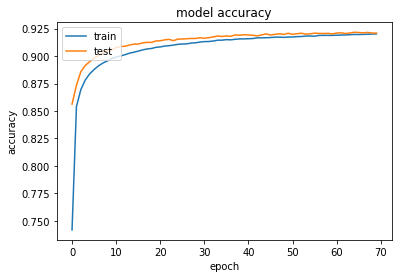

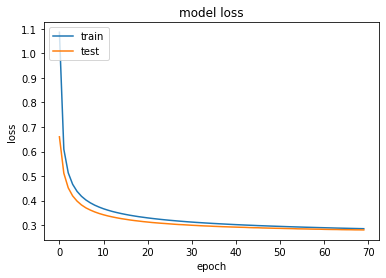

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9213
Test accuracy: 0.9212999939918518


In [13]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_0.weights

[<tf.Variable 'first_layer/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.01182194, -0.07143442, -0.00398411, ..., -0.07002718,
         -0.06060057, -0.00339469],
        [ 0.08200488, -0.0196467 ,  0.08438156, ..., -0.02844574,
          0.01626004, -0.0832996 ],
        [-0.05625058,  0.07689724, -0.04314871, ..., -0.07116959,
          0.02473933,  0.07876625],
        ...,
        [ 0.0044666 , -0.00193425, -0.03155564, ..., -0.00446316,
          0.03274216, -0.05881702],
        [-0.00286949, -0.05066209,  0.05916785, ..., -0.07443991,
          0.07143175,  0.03653288],
        [-0.02542564,  0.06398518, -0.01856478, ...,  0.02275828,
         -0.05214717, -0.01072587]], dtype=float32)>,
 <tf.Variable 'first_layer/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.3540475 ,  0.35413042,  0.08279598, -0.25758305,  0.03581994,
         1.2689586 , -0.10053985,  0.6431126 , -1.422252  , -0.25040284],
       dtype=float32)>]

In [15]:
# model_0.get_config()
model_0.save('mnistdigits_perceptron')

INFO:tensorflow:Assets written to: mnistdigits_perceptron/assets


###Improved Model 1: Adding Hidden Layer - Multi Layer Perceptron 

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 128 units to the model:
model_1.add(Dense(N_hidden, name='frist_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='second_layer', activation='relu'))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='softmax_layer', activation = 'softmax'))

In [17]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
frist_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
second_layer (Dense)         (None, 128)               16512     
_________________________________________________________________
softmax_layer (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_train.shape

(60000, 784)

In [20]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 1.5436 - accuracy: 0.5627 - val_loss: 0.4463 - val_accuracy: 0.8857
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.4389 - accuracy: 0.8822 - val_loss: 0.3324 - val_accuracy: 0.9065
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3423 - accuracy: 0.9036 - val_loss: 0.2943 - val_accuracy: 0.9139
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2990 - accuracy: 0.9134 - val_loss: 0.2676 - val_accuracy: 0.9247
Epoch 5/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2706 - accuracy: 0.9226 - val_loss: 0.2502 - val_accuracy: 0.9304
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2556 - accuracy: 0.9266 - val_loss: 0.2340 - val_accuracy: 0.9328
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2356 - accuracy: 0.9322 - val_loss: 0.2199 - val_accuracy: 0.9386

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


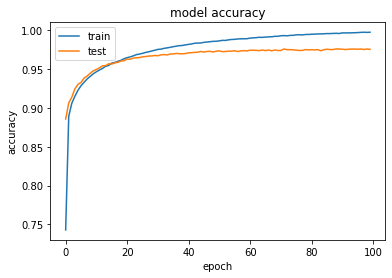

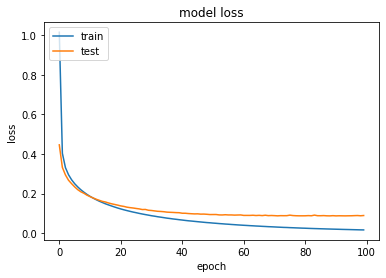

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9762
Test accuracy: 0.9761999845504761


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
frist_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
second_layer (Dense)         (None, 64)                4160      
_________________________________________________________________
softmax_layer (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.weights

[<tf.Variable 'frist_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.02462893, -0.02195248,  0.02383371, ...,  0.03463955,
         -0.02766402,  0.06504446],
        [ 0.02151432, -0.0545406 , -0.06167971, ..., -0.08053005,
         -0.03974636,  0.0099289 ],
        [ 0.02189458, -0.06688212,  0.06714154, ...,  0.003544  ,
         -0.00237268, -0.04402876],
        ...,
        [ 0.00789183,  0.06641159,  0.06743055, ...,  0.0732697 ,
         -0.0837156 ,  0.06129592],
        [-0.00362051,  0.0379677 ,  0.010162  , ...,  0.01400792,
          0.0600479 , -0.08297924],
        [ 0.00155894,  0.01882093, -0.05163996, ...,  0.00043916,
         -0.04383892,  0.03568826]], dtype=float32)>,
 <tf.Variable 'frist_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.12296277,  0.05312745, -0.00459063, -0.03500145, -0.12018252,
         0.15529048,  0.01732744,  0.16238065, -0.01890365,  0.01206397,
        -0.10634891,  0.00226891,  0.16837238,  0.13686383, -0.1075

In [ ]:
model_1.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'frist_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'frist_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_i

###Improved Model 2 - Adding Dropout to Avoid Overfitting

In [39]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_add', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [40]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_add (Dense)      (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)               

In [42]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 1.9698 - accuracy: 0.3087 - val_loss: 0.6126 - val_accuracy: 0.8470
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.8497 - accuracy: 0.7269 - val_loss: 0.3813 - val_accuracy: 0.8940
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6001 - accuracy: 0.8131 - val_loss: 0.3103 - val_accuracy: 0.9091
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5088 - accuracy: 0.8493 - val_loss: 0.2739 - val_accuracy: 0.9182
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4446 - accuracy: 0.8692 - val_loss: 0.2500 - val_accuracy: 0.9259
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3942 - accuracy: 0.8842 - val_loss: 0.2273 - val_accuracy: 0.9333
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3679 - accuracy: 0.8906 - val_loss: 0.2128 - val_accuracy: 0.9380
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


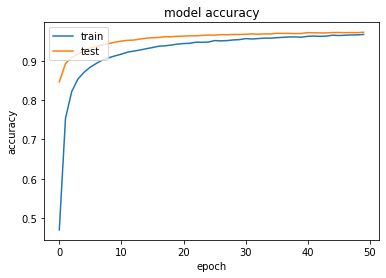

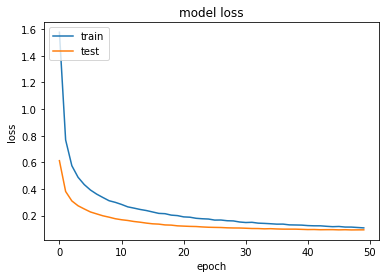

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


In [29]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.05897042,  0.04767186,  0.02037965, ...,  0.02585442,
          0.04497065,  0.07346145],
        [-0.03885227, -0.04829396, -0.04782709, ...,  0.01740511,
         -0.02558018, -0.03077037],
        [ 0.03888644, -0.06538592,  0.07422205, ..., -0.00144289,
         -0.00422412,  0.00033233],
        ...,
        [-0.01276825,  0.01863653,  0.07193587, ..., -0.06232809,
          0.03755517, -0.04560975],
        [ 0.01503586, -0.03757296,  0.04471692, ...,  0.03911948,
         -0.03318   , -0.02793232],
        [ 0.06255928,  0.0211542 , -0.00705483, ...,  0.02259002,
         -0.01571409, -0.01041145]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.04652195,  0.0068157 ,  0.04776034,  0.07042047,  0.01367685,
         0.16741535, -0.01973589, -0.25551257,  0.07891518,  0.02011587,
        -0.10963317,  0.06685136,  0.09844677,  0.02191064,  0.04

In [31]:
model_2.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.5,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrain

###Improved Model 3: Changing the Optimizer - Adam

In [ ]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_3.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=128, epochs=20, validation_split=0.2) 


Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.7093 - accuracy: 0.7751 - val_loss: 0.2281 - val_accuracy: 0.9327
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.9027 - val_loss: 0.1790 - val_accuracy: 0.9463
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.9200 - val_loss: 0.1547 - val_accuracy: 0.9548
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2370 - accuracy: 0.9305 - val_loss: 0.1438 - val_accuracy: 0.9580
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2160 - accuracy: 0.9367 - val_loss: 0.1317 - val_accuracy: 0.9611
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1992 - accuracy: 0.9409 - val_loss: 0.1213 - val_accuracy: 0.9649
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1860 - accuracy: 0.9450 - val_loss: 0.1225 - val_accuracy: 0.9642
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


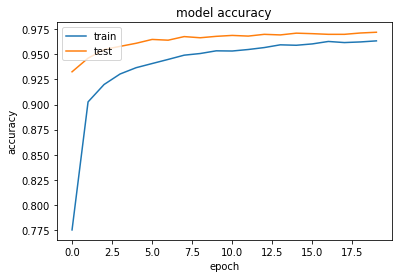

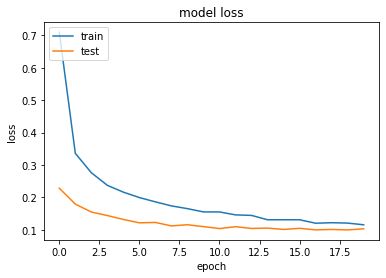

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1036 - accuracy: 0.9693
Test accuracy: 0.9692999720573425


In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.01788852,  0.04997117,  0.06614246, ...,  0.0084151 ,
          0.00821608, -0.05118785],
        [-0.00022056, -0.06866984,  0.00329696, ...,  0.06060763,
         -0.06041586,  0.04104947],
        [-0.06914849,  0.04468491, -0.00856399, ..., -0.07731034,
          0.04244415,  0.02429191],
        ...,
        [-0.07905978, -0.07528336,  0.04283901, ..., -0.00914193,
         -0.05277519, -0.07349902],
        [-0.08394137, -0.04911571, -0.01939993, ..., -0.02713561,
          0.07175904, -0.04769786],
        [-0.07325043,  0.01972195,  0.01517962, ..., -0.06113504,
         -0.05261208, -0.00109615]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.1125977 ,  0.13191916, -0.10340548,  0.02361854,  0.17368743,
         0.0633492 ,  0.00347154, -0.17375928, -0.19657594,  0.050587  ,
         0.08907962,  0.01708797, -0.05765415,  0.17009147,  0.1144

In [ ]:
model_3.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_2',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constrai

###Improved Model 4: Increasing the number of Hidden Layer neuron 

In [ ]:
#Most common type of model is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))
# Adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=31, validation_split=0.2) 


Epoch 1/31
375/375 [==============================] - 1s 3ms/step - loss: 0.3013 - accuracy: 0.9086 - val_loss: 0.1312 - val_accuracy: 0.9618
Epoch 2/31
375/375 [==============================] - 1s 2ms/step - loss: 0.1276 - accuracy: 0.9615 - val_loss: 0.0884 - val_accuracy: 0.9718
Epoch 3/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.9715 - val_loss: 0.0916 - val_accuracy: 0.9737
Epoch 4/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9769 - val_loss: 0.0824 - val_accuracy: 0.9748
Epoch 5/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.0718 - val_accuracy: 0.9772
Epoch 6/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9836 - val_loss: 0.0757 - val_accuracy: 0.9784
Epoch 7/31
375/375 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.9850 - val_loss: 0.0703 - val_accuracy: 0.9804
Epoch 

In [ ]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9824
Test accuracy: 0.9824000000953674


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


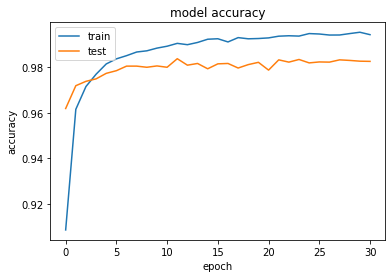

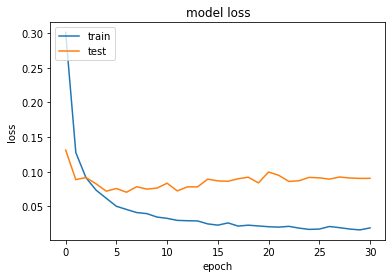

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.0350987 ,  0.02890076, -0.06416003, ...,  0.05977495,
          0.06126365, -0.01457585],
        [-0.0540298 , -0.0227532 ,  0.00462351, ..., -0.04416   ,
         -0.04929402,  0.05988169],
        [ 0.06040762, -0.00294261, -0.01463966, ...,  0.01581072,
          0.05956136, -0.03907766],
        ...,
        [ 0.0137672 ,  0.00233026,  0.05356669, ..., -0.00795822,
          0.06236725, -0.00446402],
        [-0.05470567, -0.03257103,  0.02453188, ..., -0.00881742,
          0.05389869,  0.01363385],
        [ 0.0129263 , -0.01125934,  0.02139214, ..., -0.02659062,
          0.01655393, -0.05026351]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-5.99371232e-02, -1.49576709e-01, -1.64264947e-01, -1.03853129e-01,
         7.63304532e-02,  8.23626202e-03, -7.41869062e-02,  1.86394118e-02,
        -3.30771320e-02,  8.08676146e-03, -8.30026641e-02, 

In [ ]:
model_4.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_4',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 5: Manipulating the batch size

In [ ]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))
# Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_3', activation = 'softmax'))


In [ ]:
# Compiling the model.
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 


Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.2700 - accuracy: 0.9184 - val_loss: 0.1309 - val_accuracy: 0.9603
Epoch 2/30
750/750 [==============================] - 2s 2ms/step - loss: 0.1236 - accuracy: 0.9624 - val_loss: 0.0942 - val_accuracy: 0.9707
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0936 - accuracy: 0.9709 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0757 - accuracy: 0.9761 - val_loss: 0.0874 - val_accuracy: 0.9736
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0642 - accuracy: 0.9796 - val_loss: 0.0823 - val_accuracy: 0.9751
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0578 - accuracy: 0.9824 - val_loss: 0.0762 - val_accuracy: 0.9787
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.0500 - accuracy: 0.9837 - val_loss: 0.0763 - val_accuracy: 0.9773
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


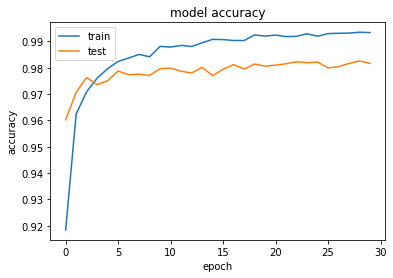

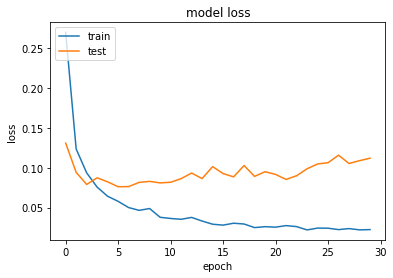

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9833
Test accuracy: 0.983299970626831


In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.06593259,  0.03519005,  0.06677879, ...,  0.04077786,
          0.02049432,  0.0265032 ],
        [-0.02560719, -0.05702535, -0.0067075 , ...,  0.01097006,
         -0.01621148, -0.03953826],
        [-0.02265137, -0.03745953,  0.01783728, ...,  0.01726241,
         -0.0553051 , -0.0358069 ],
        ...,
        [-0.06117092, -0.01791726, -0.0537577 , ..., -0.04438885,
          0.04422494,  0.01158344],
        [ 0.03987152,  0.0121283 ,  0.00418137, ...,  0.04135013,
         -0.03672458, -0.0162241 ],
        [ 0.02718371, -0.06355805,  0.03283341, ...,  0.02107023,
          0.04659288,  0.05687013]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-3.87562700e-02, -2.68058497e-02, -1.59374997e-01,  2.13728007e-02,
        -8.63048360e-02,  8.31230953e-02, -6.20678626e-02, -1.33352280e-02,
         5.08209728e-02, -7.81770423e-02, -1.44056872e-01, 

In [ ]:
model_5.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 512,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_6',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constra

###Improved Model 6: Adding Another Hidden Layer to the Model

In [115]:
import tensorflow as tf

#In Keras, layers are assembled to build models 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512

# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


In [116]:
# Compiling the model.
#opt = keras.optimizers.RMSprop(learning_rate=0.0001)
model_6.compile(optimizer='RMSprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [117]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 3s 4ms/step - loss: 0.5051 - accuracy: 0.8401 - val_loss: 0.1280 - val_accuracy: 0.9628
Epoch 2/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1562 - accuracy: 0.9569 - val_loss: 0.1131 - val_accuracy: 0.9697
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1282 - accuracy: 0.9678 - val_loss: 0.1210 - val_accuracy: 0.9709
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1270 - accuracy: 0.9696 - val_loss: 0.1362 - val_accuracy: 0.9758
Epoch 5/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1252 - accuracy: 0.9707 - val_loss: 0.1501 - val_accuracy: 0.9725
Epoch 6/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1198 - accuracy: 0.9742 - val_loss: 0.1487 - val_accuracy: 0.9756
Epoch 7/30
750/750 [==============================] - 2s 3ms/step - loss: 0.1257 - accuracy: 0.9726 - val_loss: 0.1614 - val_accuracy: 0.9742
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


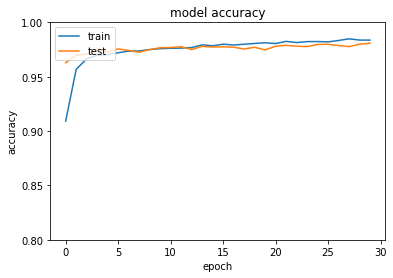

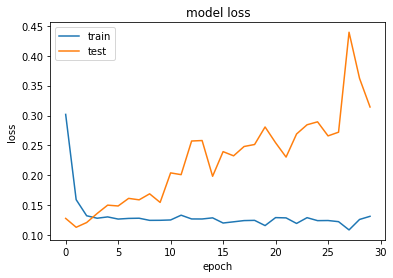

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(ticks=[0,5,10,15,20,25,30])
plt.yticks(ticks=[0.8, 0.85, 0.9, 0.95,1.0])
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9802
Test accuracy: 0.9801999926567078


In [ ]:
model_6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 10)               

In [109]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.06274249, -0.04148984, -0.04114684, ..., -0.02882751,
          0.04496888,  0.06441214],
        [-0.03753798, -0.03326217,  0.02136146, ..., -0.06790027,
         -0.06912115,  0.0008831 ],
        [-0.07050317,  0.06115473,  0.0216086 , ..., -0.03998207,
         -0.0739439 ,  0.04122152],
        ...,
        [ 0.04633906, -0.04676593,  0.0417845 , ..., -0.04262722,
          0.01235752,  0.0440312 ],
        [ 0.06750868, -0.03622452,  0.04463405, ...,  0.06350464,
          0.03087317,  0.05517536],
        [-0.04216018, -0.05669574, -0.05656337, ...,  0.04391798,
          0.07373361,  0.06072605]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.08030933, -0.08859678,  0.1595964 , -0.31883723,  0.17640097,
        -0.00135237,  0.09111959, -0.00694619, -0.05227925, -0.07140817,
         0.05001714, -0.07229086,  0.05994048,  0.15977664, -0.09

In [108]:
model_6.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_31',
    'noise_shape': None,
    'rate': 0.3,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constr

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.


###**`.ipynb file 1`** 


**Marks: 10**
- Do you get the exact same results if you run the Notebook multiple times without changing any parameters?  
> - **Observation**: We don't get the exact same results on multiple runs, the accuracy varies on each run even though the parameters are unchanged. 

- What is the effect of adding more neurons to each hidden layer?
> - **Observation**: Adding more neurons increases the accuracy, but the overfitting is not reduced. The model is still overfitted.

- What happens if we manipulate the value of dropout?
> - **Observation**: Increasing the drop out value reduced the accuracy and the model remains overfitted. Decreasing the drop out value resulted in better accuracy and reduced overfitting.

- What is the effect of adding more hidden layer to the network?
> - **Observation**: Adding an hidden layer increased the accuracy further and reduced overfitting. The model is slightly underfit which is negligible.

- What is the accuracy score if we use RMSprop for model 6?
> - **Observation**: We get accuracy of 98.5% using RMSprop for model 6.

- Does manipulating the learning rate affect the model? Justify your answer.
> - **Observation**: Yes, manipulating the learning rate affects the model accuracy. Higher learning rate reduces the accuracy and lower learning rate increases the accuracy. Too large learning rates will result in unstable training and tiny rates may result in long training process.

- What is the best parameter configuration for this project?
> - **Observation**: Considering the accuracy and fitting with batch size of 64 and 30 Epochs. Below are the preferred configuration parameters for this project.
>> - Input and Hidden layers activation function: Relu
>> - Output layer activation function: Softmax
>> - Model Optimizer: RMSprop with default learning rate
>> - Loss Function: categorical_crossentropy

